In [1]:
# H20
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import pickle

In [12]:
# Start the H2O cluster (locally)
h2o.init()
h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,13 days 1 hour 10 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,8 months and 2 days
H2O_cluster_name:,H2O_from_python_franceskoback_t76uoy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.169 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


In [13]:
with open('../data/pickle/combined_fractures_2017_2019_OCT10.pkl', 'rb') as file:
    # Use pickle.load() to load the variable from the file
    combined_fractures_2017_2019 = pickle.load(file)


In [14]:
combined_fractures_2017_2019

,INC_KEY,AGE,SEX,BLACK,WHITE,AMERICANINDIAN,ASIAN,PACIFICISLANDER,AGE<25,AGE25-60,...,10 Shoulder girdle,4 Tibia,S65 Malleolar segment,2U_ Ulna,62 Acetabulum,15 Clavicle,5 Spine,20 Elbow,TOTALGCS,Fasciotomy
0,170000017655,47.0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,15.0,1
1,170000017658,13.0,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,15.0,1
2,170000017721,21.0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,15.0,1
3,170000017757,70.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,15.0,1
4,170000017814,46.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15565,180024323317,25.0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,15.0,0
15566,170012730889,24.0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,15.0,0
15567,190030504701,47.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,15.0,0
15568,190030121240,55.0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,15.0,0


In [15]:
with open('../data/pickle/fractures_fasciotomy_2017_2019_new_OCT4.pkl', 'rb') as file:
    # Use pickle.load() to load the variable from the file
    fractures_fasciotomy_2017_2019 = pickle.load(file)


In [16]:
fractures_fasciotomy_2017_2019.columns

Index(['INC_KEY', 'AGE', 'SEX', 'BLACK', 'WHITE', 'AMERICANINDIAN', 'ASIAN',
       'PACIFICISLANDER', 'AGE<25', 'AGE25-60', 'AGE>60', 'Fasciotomy_0_6',
       'Fasciotomy_6_24', 'Fasciotomy_24_plus', '9 Craniomaxillofacial bones',
       '34 Patella', '16 Thorax', '3 Femur', '8 Foot', '2R_ Radius',
       '1 Humerus', '7 Hand', '14 Scapula', '80D Foot and ankle', '4F Fibula',
       '61 Pelvic ring', '10 Shoulder girdle', '4 Tibia',
       'S65 Malleolar segment', '2U_ Ulna', '62 Acetabulum', '15 Clavicle',
       '5 Spine', '20 Elbow', 'TOTALGCS'],
      dtype='object')

In [47]:
fractures_fasciotomy_2017_2019

,INC_KEY,AGE,SEX,BLACK,WHITE,AMERICANINDIAN,ASIAN,PACIFICISLANDER,AGE<25,AGE25-60,...,61 Pelvic ring,10 Shoulder girdle,4 Tibia,S65 Malleolar segment,2U_ Ulna,62 Acetabulum,15 Clavicle,5 Spine,20 Elbow,TOTALGCS
0,170000017655,47.0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,15.0
1,170000017658,13.0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,15.0
2,170000017721,21.0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,15.0
3,170000017757,70.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
4,170000017814,46.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,190045781799,17.0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,3.0
7781,190045782055,75.0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
7782,190045782183,43.0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,3.0
7783,190045782382,38.0,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,15.0


In [50]:
counts = fractures_fasciotomy_2017_2019['Fasciotomy_24_plus'].value_counts()

count_0 = counts.get(0, 0)
count_1 = counts.get(1, 0)

print(f'Number of people with fasciotomy before 24 hours: {count_0}')
print(f'Number of people with late fasciotomy: {count_1}')



Number of people with fasciotomy before 24 hours: 4425
Number of people with late fasciotomy: 3360


In [18]:
# Calculate the statistics for Fasciotomy_24_plus group
fasciotomy_24_plus_mean = fractures_fasciotomy_2017_2019[fractures_fasciotomy_2017_2019['Fasciotomy_24_plus'] == 1]['TOTALGCS'].mean()
fasciotomy_24_plus_mode = fractures_fasciotomy_2017_2019[fractures_fasciotomy_2017_2019['Fasciotomy_24_plus'] == 1]['TOTALGCS'].mode().values
fasciotomy_24_plus_median = fractures_fasciotomy_2017_2019[fractures_fasciotomy_2017_2019['Fasciotomy_24_plus'] == 1]['TOTALGCS'].median()

# Calculate the statistics for Fasciotomy_6_24 and Fasciotomy_0_6 group
fasciotomy_6_24_mean = fractures_fasciotomy_2017_2019[fractures_fasciotomy_2017_2019['Fasciotomy_6_24'] == 1]['TOTALGCS'].mean()
fasciotomy_6_24_mode = fractures_fasciotomy_2017_2019[fractures_fasciotomy_2017_2019['Fasciotomy_6_24'] == 1]['TOTALGCS'].mode().values
fasciotomy_6_24_median = fractures_fasciotomy_2017_2019[fractures_fasciotomy_2017_2019['Fasciotomy_6_24'] == 1]['TOTALGCS'].median()

# Calculate the statistics for Fasciotomy_0_6 group
fasciotomy_0_6_mean = fractures_fasciotomy_2017_2019[fractures_fasciotomy_2017_2019['Fasciotomy_0_6'] == 1]['TOTALGCS'].mean()
fasciotomy_0_6_mode = fractures_fasciotomy_2017_2019[fractures_fasciotomy_2017_2019['Fasciotomy_0_6'] == 1]['TOTALGCS'].mode().values
fasciotomy_0_6_median = fractures_fasciotomy_2017_2019[fractures_fasciotomy_2017_2019['Fasciotomy_0_6'] == 1]['TOTALGCS'].median()

# Display the results
print("Fasciotomy_24_plus:")
print(f"Mean TOTALGCS: {fasciotomy_24_plus_mean}")
print(f"Mode TOTALGCS: {fasciotomy_24_plus_mode}")
print(f"Median TOTALGCS: {fasciotomy_24_plus_median}\n")

print("Fasciotomy_6_24:")
print(f"Mean TOTALGCS: {fasciotomy_6_24_mean}")
print(f"Mode TOTALGCS: {fasciotomy_6_24_mode}")
print(f"Median TOTALGCS: {fasciotomy_6_24_median}\n")

print("Fasciotomy_0_6:")
print(f"Mean TOTALGCS: {fasciotomy_0_6_mean}")
print(f"Mode TOTALGCS: {fasciotomy_0_6_mode}")
print(f"Median TOTALGCS: {fasciotomy_0_6_median}\n")

# You can also calculate the difference between these groups if needed
mean_difference = fasciotomy_24_plus_mean - fasciotomy_6_24_mean
mode_difference = set(fasciotomy_24_plus_mode) - set(fasciotomy_6_24_mode)
median_difference = fasciotomy_24_plus_median - fasciotomy_6_24_median

print("Mean Difference (Fasciotomy_24_plus - Fasciotomy_6_24 and Fasciotomy_0_6):", mean_difference)
print("Mode Difference (Fasciotomy_24_plus - Fasciotomy_6_24 and Fasciotomy_0_6):", mode_difference)
print("Median Difference (Fasciotomy_24_plus - Fasciotomy_6_24 and Fasciotomy_0_6):", median_difference)


Fasciotomy_24_plus:
Mean TOTALGCS: 13.32739010144482
Mode TOTALGCS: [15.]
Median TOTALGCS: 15.0

Fasciotomy_6_24:
Mean TOTALGCS: 14.073330219523587
Mode TOTALGCS: [15.]
Median TOTALGCS: 15.0

Fasciotomy_0_6:
Mean TOTALGCS: 13.913983050847458
Mode TOTALGCS: [15.]
Median TOTALGCS: 15.0

Mean Difference (Fasciotomy_24_plus - Fasciotomy_6_24 and Fasciotomy_0_6): -0.7459401180787673
Mode Difference (Fasciotomy_24_plus - Fasciotomy_6_24 and Fasciotomy_0_6): set()
Median Difference (Fasciotomy_24_plus - Fasciotomy_6_24 and Fasciotomy_0_6): 0.0


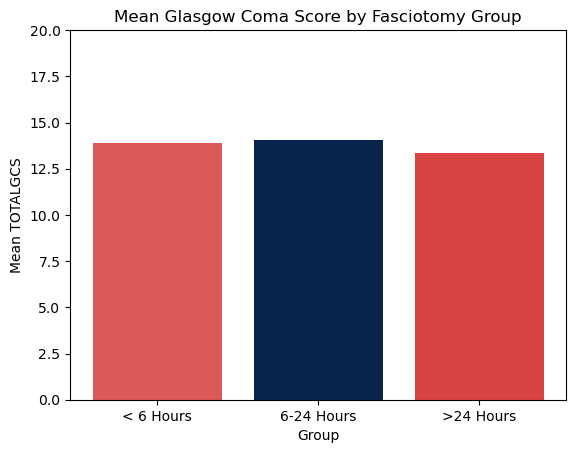

In [19]:
import matplotlib.pyplot as plt

# Data
groups = ['< 6 Hours', '6-24 Hours', '>24 Hours']
means = [fasciotomy_0_6_mean, fasciotomy_6_24_mean, fasciotomy_24_plus_mean]

# Create a bar chart
plt.bar(groups, means, color=['#dc5959', '#08244c', '#d84444'])
plt.xlabel('Group')
plt.ylabel('Mean TOTALGCS')
plt.title('Mean Glasgow Coma Score by Fasciotomy Group')
plt.ylim(0, 20)  # Set the y-axis limit

# Display the bar chart
plt.show()


In [35]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

def perform_chi2_feature_selection(dataframe, columns_to_keep, target_column, k='all'):
    # Drop rows with missing values in the specified columns
    cleaned_dataframe = dataframe.dropna(subset=columns_to_keep + [target_column])

    # Use the cleaned dataframe with selected columns
    cleaned_dataframe = cleaned_dataframe[columns_to_keep + [target_column]]

    # Separate the features (fracture locations) and the target column
    X = cleaned_dataframe.drop([target_column], axis=1)
    y = cleaned_dataframe[target_column]

    # Initialize SelectKBest with chi2 scoring function
    k_best = SelectKBest(score_func=chi2, k=k)

    # Fit and transform the features to get the scores and p-values
    X_new = k_best.fit_transform(X, y)
    p_values = k_best.pvalues_

    # Get the scores and corresponding feature names
    scores = k_best.scores_
    feature_names = X.columns

    # Create a DataFrame to display feature scores and p-values
    feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores, 'P-Value': p_values})

    # Sort the DataFrame by score in descending order
    feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

    return feature_scores_df




In [36]:
import pandas as pd

def calculate_percentage_with_other_fractures(df, target_column):
    # Filter the dataframe to include only rows with fractures in the target column
    target_fractures_df = df[df[target_column] == 1]

    # Count the total number of patients with fractures in the target column
    total_target_fractures = len(target_fractures_df)

    # Create a new dataframe excluding the target column and any other non-fracture-related columns
    relevant_columns = [col for col in df.columns if col != target_column and col not in ['INC_KEY', 'AGE', 'SEX', 'BLACK', 'WHITE', 'AMERICANINDIAN', 'ASIAN',
       'PACIFICISLANDER', 'AGE<25', 'AGE25-60', 'AGE>60', 'Fasciotomy_0_6',
       'Fasciotomy_6_24', 'Fasciotomy_24_plus','TOTALGCS']]
    other_fractures_df = target_fractures_df[relevant_columns]

    # Calculate the percentage of patients with other fractures (1 in any column)
    percentage_with_other_fractures = (other_fractures_df.sum(axis=1) > 0).sum() / total_target_fractures * 100

    return percentage_with_other_fractures

# Example usage:
column_name = '61 Pelvic ring'  # Change this to any other column you want to analyze
percentage = calculate_percentage_with_other_fractures(fractures_fasciotomy_2017_2019, column_name)
print(f"Percentage of patients with {column_name} fractures who had other fractures: {percentage:.2f}%")

column_name = '5 Spine'  # Change this to any other column you want to analyze
percentage = calculate_percentage_with_other_fractures(fractures_fasciotomy_2017_2019, column_name)
print(f"Percentage of patients with {column_name} fractures who had other fractures: {percentage:.2f}%")

column_name = '4 Tibia'  # Change this to any other column you want to analyze
percentage = calculate_percentage_with_other_fractures(fractures_fasciotomy_2017_2019, column_name)
print(f"Percentage of patients with {column_name} fractures who had other fractures: {percentage:.2f}%")



Percentage of patients with 61 Pelvic ring fractures who had other fractures: 93.41%
Percentage of patients with 5 Spine fractures who had other fractures: 94.57%
Percentage of patients with 4 Tibia fractures who had other fractures: 83.43%


In [37]:
import pandas as pd

def calculate_percentage_with_specific_fracture(df, target_column, specific_column):
    # Filter the dataframe to include only rows with fractures in the target column
    target_fractures_df = df[df[target_column] == 1]

    # Count the total number of patients with fractures in the target column
    total_target_fractures = len(target_fractures_df)

    # Calculate the percentage of patients with fractures in the target column who also had fractures in the specific column
    percentage_with_specific_fracture = (target_fractures_df[specific_column] == 1).sum() / total_target_fractures * 100

    return percentage_with_specific_fracture

# Example usage:
target_column = '61 Pelvic ring' 
specific_column = '4 Tibia'  # Change this to the second column you want to analyze (e.g., tibial fractures)

percentage = calculate_percentage_with_specific_fracture(fractures_fasciotomy_2017_2019, target_column, specific_column)
print(f"Percentage of patients with {target_column} fractures who had {specific_column} fractures: {percentage:.2f}%")

target_column = '5 Spine' 
percentage = calculate_percentage_with_specific_fracture(fractures_fasciotomy_2017_2019, target_column, specific_column)
print(f"Percentage of patients with {target_column} fractures who had {specific_column} fractures: {percentage:.2f}%")



Percentage of patients with 61 Pelvic ring fractures who had 4 Tibia fractures: 41.22%
Percentage of patients with 5 Spine fractures who had 4 Tibia fractures: 39.40%


In [38]:
import pandas as pd

def calculate_concomitant_fractures(df):
    # Filter the dataframe to include only rows with a late fasciotomy and a pelvic ring fracture
    concomitant_df = df[(df['Fasciotomy_24_plus'] == 1) & (df['61 Pelvic ring'] == 1)]

    # Calculate the total number of patients with both late fasciotomy and pelvic ring fracture
    total_concomitant_fractures = len(concomitant_df)

    # Create a list to store the results
    concomitant_fractures = []

    # Iterate through columns related to fractures and calculate the percentage of patients with a 1
    for column in df.columns:
        if column not in ['61 Pelvic ring', 'Fasciotomy_24_plus', 'INC_KEY', 'AGE', 'SEX', 'BLACK', 'WHITE', 'AMERICANINDIAN', 'ASIAN', 'PACIFICISLANDER', 'AGE<25', 'AGE25-60', 'AGE>60', 'TOTALGCS']:
            percentage = (concomitant_df[column] == 1).sum() / total_concomitant_fractures * 100
            concomitant_fractures.append((column, percentage))

    # Sort the list in descending order of percentage
    concomitant_fractures.sort(key=lambda x: x[1], reverse=True)

    return concomitant_fractures

# Example usage:
concomitant_fracture_percentages = calculate_concomitant_fractures(fractures_fasciotomy_2017_2019)

for fracture, percentage in concomitant_fracture_percentages:
    print(f"{fracture}: {percentage:.2f}%")


5 Spine: 53.04%
16 Thorax: 47.50%
4 Tibia: 41.96%
4F Fibula: 35.71%
62 Acetabulum: 31.43%
3 Femur: 29.82%
9 Craniomaxillofacial bones: 25.89%
8 Foot: 16.61%
2U_ Ulna: 14.82%
2R_ Radius: 13.57%
1 Humerus: 12.68%
7 Hand: 9.82%
10 Shoulder girdle: 6.79%
Fasciotomy_0_6: 6.61%
14 Scapula: 6.61%
15 Clavicle: 5.36%
Fasciotomy_6_24: 4.64%
34 Patella: 3.39%
80D Foot and ankle: 3.39%
S65 Malleolar segment: 0.00%
20 Elbow: 0.00%


In [39]:
import pandas as pd

def calculate_only_pelvic_ring_fasciotomy(df):
    # Filter the dataframe to include only rows with a late fasciotomy and a pelvic ring fracture
    concomitant_df = df[(df['Fasciotomy_24_plus'] == 1) & (df['61 Pelvic ring'] == 1)]

    # Filter the dataframe to include only rows with a late fasciotomy and NO OTHER fractures
    only_pelvic_ring_df = concomitant_df[(concomitant_df[['10 Shoulder girdle', '3 Femur', '1 Humerus', 'S65 Malleolar segment',
       '7 Hand', '62 Acetabulum', '2U_ Ulna', '15 Clavicle', '20 Elbow',
       '8 Foot', '5 Spine', '9 Craniomaxillofacial bones',
       '80D Foot and ankle', '34 Patella', '16 Thorax', '4 Tibia',
       '14 Scapula', '2R_ Radius', '4F Fibula']] == 0).all(axis=1)]

    # Calculate the total number of patients with only a pelvic ring fracture and late fasciotomy
    total_only_pelvic_ring = len(only_pelvic_ring_df)

    # Calculate the total number of patients with a late fasciotomy and pelvic ring fracture
    total_concomitant_fractures = len(concomitant_df)

    # Calculate the percentage of people who ONLY had a pelvic ring fracture and late fasciotomy
    percentage_only_pelvic_ring = (total_only_pelvic_ring / total_concomitant_fractures) * 100

    return percentage_only_pelvic_ring

# Example usage:
percentage = calculate_only_pelvic_ring_fasciotomy(fractures_fasciotomy_2017_2019)
print(f"Percentage of people who ONLY had a pelvic ring fracture and late fasciotomy: {percentage:.2f}%")


Percentage of people who ONLY had a pelvic ring fracture and late fasciotomy: 7.14%


In [40]:
import pandas as pd
import statsmodels.api as sm

# Load your dataset
# fractures_fasciotomy_2017_2019 = pd.read_csv('your_data.csv')

# Define your independent variables (predictors) and the dependent variable
X = fractures_fasciotomy_2017_2019[['AGE<25', 'AGE25-60', 'AGE>60', 'SEX']]
Y = fractures_fasciotomy_2017_2019['Fasciotomy_24_plus']

# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression analysis
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Fasciotomy_24_plus   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.213
Date:                Sat, 30 Dec 2023   Prob (F-statistic):             0.0651
Time:                        13:50:21   Log-Likelihood:                -5572.3
No. Observations:                7785   AIC:                         1.115e+04
Df Residuals:                    7780   BIC:                         1.119e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3320      0.061      5.440      0.0

In [15]:
import pandas as pd

def calculate_percentage_with_tibia_or_fibula_fractures(df, target_column):
    # Filter the dataframe to include only rows with fractures in the target column
    target_fractures_df = df[df[target_column] == 1]

    # Count the total number of patients with fractures in the target column
    total_target_fractures = len(target_fractures_df)

    # Calculate the percentage of patients with fractures in the target column who also had tibia or fibula fractures
    tibia_or_fibula_fractures = (target_fractures_df['4F Fibula'] == 1) | (target_fractures_df['4 Tibia'] == 1)
    percentage_with_tibia_or_fibula_fractures = tibia_or_fibula_fractures.sum() / total_target_fractures * 100

    return percentage_with_tibia_or_fibula_fractures

# Example usage:
target_column = '5 Spine'  

percentage = calculate_percentage_with_tibia_or_fibula_fractures(fractures_fasciotomy_2017_2019, target_column)
print(f"Percentage of patients with {target_column} fractures who had tibia or fibula fractures: {percentage:.2f}%")

target_column = '61 Pelvic ring'
percentage = calculate_percentage_with_tibia_or_fibula_fractures(fractures_fasciotomy_2017_2019, target_column)
print(f"Percentage of patients with {target_column} fractures who had tibia or fibula fractures: {percentage:.2f}%")


Percentage of patients with 5 Spine fractures who had tibia or fibula fractures: 45.36%
Percentage of patients with 61 Pelvic ring fractures who had tibia or fibula fractures: 47.90%


In [6]:
combined_fractures_2017_2019

,INC_KEY,AGE,SEX,BLACK,WHITE,AMERICANINDIAN,ASIAN,PACIFICISLANDER,AGE<25,AGE25-60,...,10 Shoulder girdle,4 Tibia,S65 Malleolar segment,2U_ Ulna,62 Acetabulum,15 Clavicle,5 Spine,20 Elbow,Fasciotomy,TOTALGCS
0,170000017655,47.0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,15.0
1,170000017658,13.0,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,15.0
2,170000017721,21.0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,15.0
3,170000017757,70.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,15.0
4,170000017814,46.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15565,180024323317,25.0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,NaN
15566,170012730889,24.0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
15567,190030504701,47.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
15568,190030121240,55.0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,NaN


### Sanity check to make sure only 1 or 0 in fasciotomy column

In [7]:
unique_values = combined_fractures_2017_2019['Fasciotomy'].unique()
print(unique_values)

[1 0]


## First Analysis:: Fracture Location for Late vs Early Fascitomy 

In [21]:
columns_to_remove = ['ICDDIAGNOSISCODE', 'ICDDiagnosisCode_Desc','INC_KEY']

columns_to_keep_fractures= ['10 Shoulder girdle', '3 Femur', '1 Humerus', 'S65 Malleolar segment',
       '7 Hand', '62 Acetabulum', '2U_ Ulna', '15 Clavicle', '20 Elbow',
       '8 Foot', '5 Spine', '9 Craniomaxillofacial bones',
       '80D Foot and ankle', '34 Patella', '16 Thorax', '4 Tibia',
       '14 Scapula', '2R_ Radius', '61 Pelvic ring', '4F Fibula','Fasciotomy_24_plus'] 

columns_to_keep_demo= ['SEX', 'BLACK', 'WHITE', 'AMERICANINDIAN', 'ASIAN', 'PACIFICISLANDER',
                   'AGE<25', 'AGE25-60', 'AGE>60', 'TOTALGCS','Fasciotomy_24_plus']


# fasciotomy_df= combined_fractures_2017_2019[combined_fractures_2017_2019['Fasciotomy'] == 1]
# nofasciotomy_df= combined_fractures_2017_2019[combined_fractures_2017_2019['Fasciotomy'] == 0]
fasciotomy_df=fractures_fasciotomy_2017_2019

H2O_df_fractures_fasciotomy = fasciotomy_df[columns_to_keep_fractures].copy()
H2O_df_demo_fasciotomy = fasciotomy_df[columns_to_keep_demo].copy()

# # List of columns to exclude from conversion to categorical
# columns_to_exclude = [
#     'INC_KEY','AGE','TOTALGCS',''
# ]

# # Convert all columns to categorical except those in columns_to_exclude
# columns_to_convert = [col for col in H2O_df.columns if col not in columns_to_exclude]

# H2O_df[columns_to_convert] = H2O_df[columns_to_convert].astype('category')

In [22]:
H2O_df_fractures_fasciotomy.head(10).to_csv('H2O_df_fractures_fasciotomy.csv')

## Fractures Fasciotomy AutoML
### Which fractures are associated with Late Fasciotomy? 

In [24]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split

# Assuming AutoML_dataframe is your H2O DataFrame
AutoML_dataframe = H2O_df_fractures_fasciotomy

# Split the DataFrame into train and test sets
train, test = train_test_split(AutoML_dataframe, test_size=0.2, random_state=42)

# Initialize H2O
h2o.init()

# Convert train, a Pandas dataframe into an H2O dataframe
train_h2o = h2o.H2OFrame(train)

# columns_to_convert = [col for col in train_h2o.columns] # if col == 'Fasciotomy_24_plus'
# train_h2o[columns_to_convert] = train_h2o[columns_to_convert].ascategorical()

# Create an automl object
# Allows for GBM and XGBoost models, and will keep creating models until max_runtime_sec or 20 models have been created
aml = H2OAutoML(include_algos=["GBM", "XGBoost"], max_runtime_secs=10000000000000000, max_models=20, seed=42)

# All columns other than the label column are features used for training
x = train_h2o.columns
y = 'Fasciotomy_24_plus'
x.remove(y)

# Train the AutoML model
aml.train(x=x, y=y, training_frame=train_h2o)


Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,13 days 1 hour 11 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,8 months and 2 days
H2O_cluster_name:,H2O_from_python_franceskoback_t76uoy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.169 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"



13:47:49.114: _train param, Dropping bad and constant columns: [20 Elbow, S65 Malleolar segment]
13:47:49.114: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


13:47:52.576: _train param, Dropping bad and constant columns: [20 Elbow, S65 Malleolar segment]
13:47:52.576: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


13:47:55.640: _train param, Dropping bad and constant columns: [20 Elbow, S65 Malleolar segment]
13:47:55.640: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
13:47:56

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20231230_134748


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    26                 26                          7860                   8            12           9.92308       16            23            19.1154

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.23534629466432772
RMSE: 0.4851250299297365
MAE: 0.4738715650536498
RMSLE: 0.34113822928111576
Mean Residual Deviance: 0.23534629466432772

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.23879038526215762
RMSE: 0.48866183119019807
MAE: 0.4777016571431147
RMSLE: 0.34363271726459804
Mean Residual Deviance: 0.23879038526215762

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.477197   0.00341783  0.479917      0.476709      0.47589       0.481032      0.472435
mean_residual_deviance  0.239187   0.00411982  0.242168      0.238863      0.236667      0.244245      0.233993
mse                     0.239187   0.00411982  0.242168      0.238863      0.236667      0.244245      0.233993
r2                      0.0231292  0.0137935   0.0154984     0.0160635     0.030307      0.00996071    0.0438164
residual_deviance       0.239187   0.00411982  0.242168      0.238863      0.236667      0.244245      0.233993
rmse                    0.489053   0.00421215  0.492105      0.488736      0.486484      0.494211      0.483729
rmsle                   0.343863   0.00224878  0.345065      0.345443      0.343233      0.345394      0.340183

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-12-30 13:47:55  2.550 sec   0                  0.494915         0.489881        0.24494
    2023-12-30 13:47:55  2.729 sec   5                  0.490583         0.484895        0.240671
    2023-12-30 13:47:55  2.832 sec   10                 0.487921         0.480641        0.238067
    2023-12-30 13:47:55  2.916 sec   15                 0.486763         0.477893        0.236938
    2023-12-30 13:47:55  2.992 sec   20                 0.485864         0.475781        0.236064
    2023-12-30 13:47:55  3.031 sec   25                 0.485252         0.4743          0.235469
    2023-12-30 13:47:55  3.038 sec   26                 0.485125         0.473872        0.235346

Variable Importances: 
variable                     relative_importance    scaled_importance    percentage
---------------------------  ---------------------  -------------------  ------------
61 Pelvic ring               69.7802                1                    0.229145
4 Tibia                      48.1843                0.690515             0.158228
5 Spine                      37.6622                0.539727             0.123676
4F Fibula                    23.8507                0.341797             0.0783211
8 Foot                       16.8668                0.241713             0.0553872
1 Humerus                    16.4855                0.236248             0.0541351
9 Craniomaxillofacial bones  16.3184                0.233854             0.0535866
7 Hand                       14.6609                0.210101             0.0481436
2R_ Radius                   13.1396                0.1883               0.043148
2U_ Ulna                     12.5033                0.179181     

In [25]:
H2O_df_fractures_fasciotomy.head(10).to_csv('H2O_df_fractures_fasciotomy.csv')

In [26]:
unique_values = AutoML_dataframe['Fasciotomy_24_plus'].unique()
print(unique_values)

[1 0]


In [28]:
# Look at the results for the best model
# aml = aml object from above
# test = dataframe of test data (should be in the same format as the train dataframe)
# name = the name of the label column
# verbose = true will print out the performance of the top 10 models

def aml_regression_results(aml, test, name, verbose=True):
    lb = aml.leaderboard
    if verbose:
        print(lb.head(rows=lb.nrows))
    
    perf = aml.leader.model_performance(test)
    pred = aml.leader.predict(test)
    if verbose:
        print('RMSE: {:.1f}\tR2: {:.3f}'.format(perf.rmse(), perf.r2()))
        print('Mean: {:.1f}\tStdDev: {:.1f}\nMedian: {:.1f}\nMax: {}\tMin: {}'.format(test[name].mean()[0], test[name].sd()[0], test[name].median()[0], test[name].max(), test[name].min()))
        print('Mean: {:.1f}\tStdDev: {:.1f}\nMedian: {:.1f}\nMax: {}\tMin: {}'.format(pred.mean()[0], pred.sd()[0], pred.median()[0], pred.max(), pred.min()))
    return {'Pred': pred.as_data_frame(), 
            'rmse': perf.rmse(), 
            'r^2': perf.r2(), 
            'test mean': test[name].mean()[0], 
            'test sd': test[name].sd()[0], 
            'test med': test[name].median()[0], 
            'test max': test[name].max(), 
            'test min': test[name].min(),
            'pred mean': pred.mean()[0], 
            'pred sd': pred.sd()[0],
            'pred med': pred.median()[0],
            'pred max': pred.max(),
            'pred min': pred.min()
           }

test_h2o = h2o.H2OFrame(test)
results_fractures_fasciotomy= aml_regression_results(aml, test_h2o, 'Fasciotomy_24_plus', verbose=False)

In [29]:
results_fractures_fasciotomy

{'Pred':        predict
 0     0.346772
 1     0.318082
 2     0.489644
 3     0.463464
 4     0.444132
 ...        ...
 1552  0.487414
 1553  0.438757
 1554  0.438028
 1555  0.385428
 1556  0.463464
 
 [1557 rows x 1 columns],
 'rmse': 0.4935698242893385,
 'r^2': 0.012503697380683909,
 'test mean': 0.4425176621708414,
 'test sd': 0.4968443676685801,
 'test med': 0.0,
 'test max': 1.0,
 'test min': 0.0,
 'pred mean': 0.42605988561642205,
 'pred sd': 0.07896918838785841,
 'pred med': 0.43802802350739695,
 'pred max': 0.6341117063221846,
 'pred min': 0.23680780891492942}

## Demo Fasciotomy AutoML
### Which demographic features are associated with Late Fasciotomy? 

In [30]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split

# Assuming AutoML_dataframe is your H2O DataFrame
AutoML_dataframe = H2O_df_demo_fasciotomy

# Split the DataFrame into train and test sets
train, test = train_test_split(AutoML_dataframe, test_size=0.2, random_state=42)

# Initialize H2O
h2o.init()

# Convert train, a Pandas dataframe into an H2O dataframe
train_h2o = h2o.H2OFrame(train)

# columns_to_convert = [col for col in train_h2o.columns] # if col == 'Fasciotomy_24_plus'
# train_h2o[columns_to_convert] = train_h2o[columns_to_convert].ascategorical()

# Create an automl object
# Allows for GBM and XGBoost models, and will keep creating models until max_runtime_sec or 20 models have been created
aml = H2OAutoML(include_algos=["GBM", "XGBoost"], max_runtime_secs=10000000000000000, max_models=20, seed=42)

# All columns other than the label column are features used for training
x = train_h2o.columns
y = 'Fasciotomy_24_plus'
x.remove(y)

# Train the AutoML model
aml.train(x=x, y=y, training_frame=train_h2o)


Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,13 days 1 hour 13 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,8 months and 2 days
H2O_cluster_name:,H2O_from_python_franceskoback_t76uoy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.160 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"



13:49:15.171: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


13:49:16.231: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


13:49:17.562: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


13:49:18.24: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


13:49:18.399: _response param, We have detected that your respon

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_2_20231230_134915


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    23                 23                          5091                   4            6            4.95652       7             19            13

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.24046230185117298
RMSE: 0.4903695564073824
MAE: 0.4823834441970692
RMSLE: 0.3448959499420966
Mean Residual Deviance: 0.24046230185117298

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.24191753339193114
RMSE: 0.4918511292982168
MAE: 0.48399865668626435
RMSLE: 0.34594421953800253
Mean Residual Deviance: 0.24191753339193114

Cross-Validation Metrics Summary: 
                        mean      sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.483565  0.000985056  0.484452      0.482741      0.483301      0.484745      0.482589
mean_residual_deviance  0.242052  0.00120112   0.2431        0.240805      0.24164       0.243532      0.241181
mse                     0.242052  0.00120112   0.2431        0.240805      0.24164       0.243532      0.241181
r2                      0.0114    0.00248857   0.0117091     0.00806345    0.00993071    0.0128501     0.0144467
residual_deviance       0.242052  0.00120112   0.2431        0.240805      0.24164       0.243532      0.241181
rmse                    0.491986  0.0012203    0.493052      0.490719      0.491569      0.493489      0.491102
rmsle                   0.346007  0.000939209  0.346083      0.347261      0.346514      0.345057      0.345118

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-12-30 13:49:17  1.071 sec   0                  0.494915         0.489881        0.24494
    2023-12-30 13:49:17  1.175 sec   5                  0.492339         0.48685         0.242398
    2023-12-30 13:49:17  1.217 sec   10                 0.491513         0.485562        0.241586
    2023-12-30 13:49:17  1.263 sec   15                 0.490919         0.484221        0.241001
    2023-12-30 13:49:17  1.300 sec   20                 0.490566         0.483097        0.240655
    2023-12-30 13:49:17  1.310 sec   23                 0.49037          0.482383        0.240462

Variable Importances: 
variable         relative_importance    scaled_importance    percentage
---------------  ---------------------  -------------------  ------------
TOTALGCS         109.656                1                    0.72771
AGE25-60         12.8557                0.117237             0.0853147
SEX              9.78182                0.0892049            0.0649153
BLACK            7.32452                0.0667956            0.0486078
WHITE            5.70427                0.0520198            0.0378553
AGE<25           3.50714                0.0319832            0.0232745
AGE>60           1.49076                0.0135949            0.00989313
ASIAN            0.366085               0.0033385            0.00242946
AMERICANINDIAN   0                      0                    0
PACIFICISLANDER  0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [52]:
# Look at the results for the best model
# aml = aml object from above
# test = dataframe of test data (should be in the same format as the train dataframe)
# name = the name of the label column
# verbose = true will print out the performance of the top 10 models

def aml_regression_results(aml, test, name, verbose=True):
    lb = aml.leaderboard
    if verbose:
        print(lb.head(rows=lb.nrows))
    
    perf = aml.leader.model_performance(test)
    pred = aml.leader.predict(test)
    if verbose:
        print('RMSE: {:.1f}\tR2: {:.3f}'.format(perf.rmse(), perf.r2()))
        print('Mean: {:.1f}\tStdDev: {:.1f}\nMedian: {:.1f}\nMax: {}\tMin: {}'.format(test[name].mean()[0], test[name].sd()[0], test[name].median()[0], test[name].max(), test[name].min()))
        print('Mean: {:.1f}\tStdDev: {:.1f}\nMedian: {:.1f}\nMax: {}\tMin: {}'.format(pred.mean()[0], pred.sd()[0], pred.median()[0], pred.max(), pred.min()))
    return {'Pred': pred.as_data_frame(), 
            'rmse': perf.rmse(), 
            'r^2': perf.r2(), 
            'test mean': test[name].mean()[0], 
            'test sd': test[name].sd()[0], 
            'test med': test[name].median()[0], 
            'test max': test[name].max(), 
            'test min': test[name].min(),
            'pred mean': pred.mean()[0], 
            'pred sd': pred.sd()[0],
            'pred med': pred.median()[0],
            'pred max': pred.max(),
            'pred min': pred.min()
           }

test_h2o = h2o.H2OFrame(test)
results_demo_fasciotomy= aml_regression_results(aml, test_h2o, 'Fasciotomy_24_plus', verbose=False)

In [53]:
results_demo_fasciotomy

{'Pred':        predict
 0     0.366485
 1     0.377727
 2     0.366485
 3     0.392931
 4     0.385550
 ...        ...
 1552  0.423198
 1553  0.423198
 1554  0.553562
 1555  0.372731
 1556  0.423198
 
 [1557 rows x 1 columns],
 'rmse': 0.49690932633741414,
 'r^2': -0.0009043436521318782,
 'test mean': 0.4425176621708414,
 'test sd': 0.4968443676685801,
 'test med': 0.0,
 'test max': 1.0,
 'test min': 0.0,
 'pred mean': 0.4277458442908006,
 'pred sd': 0.05348088144694118,
 'pred med': 0.41145032169344814,
 'pred max': 0.5793545589932565,
 'pred min': 0.35782154912351144}

In [54]:
columns_to_keep_demo= ['SEX', 'BLACK', 'WHITE', 'AMERICANINDIAN', 'ASIAN', 'PACIFICISLANDER',
                   'AGE<25', 'AGE25-60', 'AGE>60', 'TOTALGCS','Fasciotomy_24_plus']

columns_to_keep_fractures= ['Fasciotomy_24_plus',
       '10 Shoulder girdle', '3 Femur', '1 Humerus', 'S65 Malleolar segment',
       '7 Hand', '62 Acetabulum', '2U_ Ulna', '15 Clavicle', '20 Elbow',
       '8 Foot', '5 Spine', '9 Craniomaxillofacial bones',
       '80D Foot and ankle', '34 Patella', '16 Thorax', '4 Tibia',
       '14 Scapula', '2R_ Radius', '61 Pelvic ring', '4F Fibula'] 

In [55]:
result_df_fractures = perform_chi2_feature_selection(
    H2O_df_fractures_fasciotomy, columns_to_keep_fractures, 'Fasciotomy_24_plus', k='all'
)

print("Fractures result is: \n",result_df_fractures)

result_df_demo = perform_chi2_feature_selection(
    H2O_df_demo_fasciotomy, columns_to_keep_demo, 'Fasciotomy_24_plus', k='all'
)

print("Demographic result is: \n",result_df_demo)

Fractures result is: 
                         Feature      Score       P-Value
18               61 Pelvic ring  75.224257  4.201732e-18
15                      4 Tibia  42.147004  8.466353e-11
10                      5 Spine  40.274663  2.206521e-10
19                    4F Fibula  27.607560  1.485969e-07
4                        7 Hand  17.210769  3.345346e-05
5                 62 Acetabulum  13.752142  2.085829e-04
14                    16 Thorax  11.274964  7.855939e-04
2                     1 Humerus  11.147838  8.412966e-04
11  9 Craniomaxillofacial bones   9.078693  2.586048e-03
7                   15 Clavicle   8.934497  2.798345e-03
13                   34 Patella   5.038309  2.479267e-02
1                       3 Femur   3.347720  6.729816e-02
9                        8 Foot   2.595676  1.071557e-01
0            10 Shoulder girdle   1.484725  2.230367e-01
16                   14 Scapula   1.092890  2.958317e-01
17                   2R_ Radius   0.562524  4.532451e-01
6       

# 2nd Analysis: Fasciotomy or Not?

In [42]:
columns_to_keep_fractures= ['10 Shoulder girdle', '3 Femur', '1 Humerus', 'S65 Malleolar segment',
       '7 Hand', '62 Acetabulum', '2U_ Ulna', '15 Clavicle', '20 Elbow',
       '8 Foot', '5 Spine', '9 Craniomaxillofacial bones',
       '80D Foot and ankle', '34 Patella', '16 Thorax', '4 Tibia',
       '14 Scapula', '2R_ Radius', '61 Pelvic ring', '4F Fibula','Fasciotomy'] 

columns_to_keep_demo= ['SEX', 'BLACK', 'WHITE', 'AMERICANINDIAN', 'ASIAN', 'PACIFICISLANDER',
                   'AGE<25', 'AGE25-60', 'AGE>60', 'TOTALGCS','Fasciotomy']

H2O_df_fractures = combined_fractures_2017_2019[columns_to_keep_fractures].copy()
H2O_df_demo = combined_fractures_2017_2019[columns_to_keep_demo].copy()

# # List of columns to exclude from conversion to categorical
# columns_to_exclude = [
#     'INC_KEY','AGE','TOTALGCS',''
# ]

# # Convert all columns to categorical except those in columns_to_exclude
# columns_to_convert = [col for col in H2O_df.columns if col not in columns_to_exclude]

# H2O_df[columns_to_convert] = H2O_df[columns_to_convert].astype('category')

## Fractures No vs Fasciotomy AutoML
### Which fractures are associated with Fasciotomy vs No? 

In [42]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split

# Assuming AutoML_dataframe is your H2O DataFrame
AutoML_dataframe = H2O_df_fractures

# Split the DataFrame into train and test sets
train, test = train_test_split(AutoML_dataframe, test_size=0.2, random_state=42)

# Initialize H2O
h2o.init()

# Convert train, a Pandas dataframe into an H2O dataframe
train_h2o = h2o.H2OFrame(train)

# columns_to_convert = [col for col in train_h2o.columns] # if col == 'Fasciotomy_24_plus'
# train_h2o[columns_to_convert] = train_h2o[columns_to_convert].ascategorical()

# Create an automl object
# Allows for GBM and XGBoost models, and will keep creating models until max_runtime_sec or 20 models have been created
aml = H2OAutoML(include_algos=["GBM", "XGBoost"], max_runtime_secs=10000000000000000, max_models=20, seed=42)

# All columns other than the label column are features used for training
x = train_h2o.columns
y = 'Fasciotomy'
x.remove(y)

# Train the AutoML model
aml.train(x=x, y=y, training_frame=train_h2o)


Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,1 hour 40 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,5 months and 12 days
H2O_cluster_name:,H2O_from_python_franceskoback_lq8itk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.144 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"



16:25:30.930: AutoML: XGBoost is not available; skipping it.
16:25:30.934: _train param, Dropping bad and constant columns: [20 Elbow, S65 Malleolar segment]
16:25:30.935: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


16:25:32.636: _train param, Dropping bad and constant columns: [20 Elbow, S65 Malleolar segment]
16:25:32.636: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


16:25:33.864: _train param, Dropping bad and constant columns: [20 Elbow, S65 Malleolar segment]
16:25:33.864: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, conver

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_6_20231010_162530_model_10


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    33                 33                          39271                  0            13           12.4242       1             106           88.7576

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.17570417581447142
RMSE: 0.4191708193737625
MAE: 0.3598980189503847
RMSLE: 0.29434758956087664
Mean Residual Deviance: 0.17570417581447142

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.1822428303135653
RMSE: 0.4268990868033865
MAE: 0.3663912848896782
RMSLE: 0.29901522564803723
Mean Residual Deviance: 0.1822428303135653

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.363792  0.00208814  0.360949      0.365395      0.362236      0.365667      0.364714
mean_residual_deviance  0.182402  0.00251351  0.179305      0.182151      0.180964      0.18582       0.183769
mse                     0.182402  0.00251351  0.179305      0.182151      0.180964      0.18582       0.183769
r2                      0.270307  0.0100768   0.282714      0.271324      0.276142      0.256694      0.264663
residual_deviance       0.182402  0.00251351  0.179305      0.182151      0.180964      0.18582       0.183769
rmse                    0.427077  0.00294118  0.423444      0.426791      0.425399      0.431068      0.428683
rmsle                   0.299004  0.00194649  0.296542      0.299395      0.297921      0.301763      0.299399

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-10-10 16:25:49  11.745 sec  0                  0.499998         0.499996        0.249998
    2023-10-10 16:25:49  11.794 sec  5                  0.451821         0.442582        0.204142
    2023-10-10 16:25:49  11.838 sec  10                 0.432894         0.408492        0.187397
    2023-10-10 16:25:49  11.882 sec  15                 0.425218         0.387175        0.180811
    2023-10-10 16:25:49  11.925 sec  20                 0.421901         0.37366         0.178
    2023-10-10 16:25:49  11.970 sec  25                 0.420294         0.365376        0.176647
    2023-10-10 16:25:49  12.010 sec  30                 0.419432         0.361144        0.175923
    2023-10-10 16:25:49  12.029 sec  33                 0.419171         0.359898        0.175704

Variable Importances: 
variable                     relative_importance    scaled_importance    percentage
---------------------------  ---------------------  -------------------  ------------
4 Tibia                      1360.54                1                    0.35742
4F Fibula                    534.91                 0.393159             0.140523
8 Foot                       350.208                0.257403             0.0920012
7 Hand                       295.941                0.217517             0.077745
2U_ Ulna                     240.433                0.176718             0.0631627
16 Thorax                    172.359                0.126684             0.0452795
2R_ Radius                   165.363                0.121542             0.0434414
5 Spine                      147.645                0.108519             0.0387868
9 Craniomaxillofacial bones  109.593               

In [43]:
# Look at the results for the best model
# aml = aml object from above
# test = dataframe of test data (should be in the same format as the train dataframe)
# name = the name of the label column
# verbose = true will print out the performance of the top 10 models

def aml_regression_results(aml, test, name, verbose=True):
    lb = aml.leaderboard
    if verbose:
        print(lb.head(rows=lb.nrows))
    
    perf = aml.leader.model_performance(test)
    pred = aml.leader.predict(test)
    if verbose:
        print('RMSE: {:.1f}\tR2: {:.3f}'.format(perf.rmse(), perf.r2()))
        print('Mean: {:.1f}\tStdDev: {:.1f}\nMedian: {:.1f}\nMax: {}\tMin: {}'.format(test[name].mean()[0], test[name].sd()[0], test[name].median()[0], test[name].max(), test[name].min()))
        print('Mean: {:.1f}\tStdDev: {:.1f}\nMedian: {:.1f}\nMax: {}\tMin: {}'.format(pred.mean()[0], pred.sd()[0], pred.median()[0], pred.max(), pred.min()))
    return {'Pred': pred.as_data_frame(), 
            'rmse': perf.rmse(), 
            'r^2': perf.r2(), 
            'test mean': test[name].mean()[0], 
            'test sd': test[name].sd()[0], 
            'test med': test[name].median()[0], 
            'test max': test[name].max(), 
            'test min': test[name].min(),
            'pred mean': pred.mean()[0], 
            'pred sd': pred.sd()[0],
            'pred med': pred.median()[0],
            'pred max': pred.max(),
            'pred min': pred.min()
           }

test_h2o = h2o.H2OFrame(test)
results_fractures= aml_regression_results(aml, test_h2o, 'Fasciotomy', verbose=False)

In [44]:
results_fractures

{'Pred':        predict
 0     0.587443
 1     0.735578
 2     0.735578
 3     0.919694
 4     0.705677
 ...        ...
 3109  0.707565
 3110  0.295570
 3111  0.735578
 3112  0.735578
 3113  0.345736
 
 [3114 rows x 1 columns],
 'rmse': 0.43419635298947956,
 'r^2': 0.24579330875167427,
 'test mean': 0.49421965317919075,
 'test sd': 0.5000468830436202,
 'test med': 0.0,
 'test max': 1.0,
 'test min': 0.0,
 'pred mean': 0.5010765042509484,
 'pred sd': 0.25697670225815344,
 'pred med': 0.5417016852038745,
 'pred max': 1.020820779292548,
 'pred min': 0.09930433032015062}

## Demographic No vs Fasciotomy AutoML
### Which demographic features are associated with Late Fasciotomy? 

In [45]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split

# Assuming AutoML_dataframe is your H2O DataFrame
AutoML_dataframe = H2O_df_demo

# Split the DataFrame into train and test sets
train, test = train_test_split(AutoML_dataframe, test_size=0.2, random_state=42)

# Initialize H2O
h2o.init()

# Convert train, a Pandas dataframe into an H2O dataframe
train_h2o = h2o.H2OFrame(train)

# columns_to_convert = [col for col in train_h2o.columns] # if col == 'Fasciotomy_24_plus'
# train_h2o[columns_to_convert] = train_h2o[columns_to_convert].ascategorical()

# Create an automl object
# Allows for GBM and XGBoost models, and will keep creating models until max_runtime_sec or 20 models have been created
aml = H2OAutoML(include_algos=["GBM", "XGBoost"], max_runtime_secs=10000000000000000, max_models=20, seed=42)

# All columns other than the label column are features used for training
x = train_h2o.columns
y = 'Fasciotomy'
x.remove(y)

# Train the AutoML model
aml.train(x=x, y=y, training_frame=train_h2o)


Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,1 hour 41 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,5 months and 12 days
H2O_cluster_name:,H2O_from_python_franceskoback_lq8itk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.136 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"



16:26:09.59: AutoML: XGBoost is not available; skipping it.
16:26:09.63: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


16:26:09.818: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


16:26:10.526: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


16:26:11.130: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
16:26:

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_7_20231010_162609_model_32


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    36                 36                          9896                   0            5            4.80556       1             29            17.3889

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.2238538149079536
RMSE: 0.4731319212523645
MAE: 0.4519374121959078
RMSLE: 0.33257200243769885
Mean Residual Deviance: 0.2238538149079536

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.22618720518525864
RMSE: 0.47559142673649896
MAE: 0.45410187828372267
RMSLE: 0.33417189846952045
Mean Residual Deviance: 0.22618720518525864

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.453852   0.00318107  0.451089      0.458908      0.452663      0.45492       0.451679
mean_residual_deviance  0.226214   0.00306197  0.222828      0.230861      0.225204      0.227391      0.224788
mse                     0.226214   0.00306197  0.222828      0.230861      0.225204      0.227391      0.224788
r2                      0.0950362  0.0122267   0.108606      0.076461      0.0991833     0.0904045     0.100526
residual_deviance       0.226214   0.00306197  0.222828      0.230861      0.225204      0.227391      0.224788
rmse                    0.475611   0.00321345  0.472046      0.48048       0.474556      0.476855      0.474118
rmsle                   0.334172   0.00213326  0.332822      0.337423      0.333676      0.334984      0.331957

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-10-10 16:26:23  3.020 sec   0                  0.499998         0.499996        0.249998
    2023-10-10 16:26:23  3.037 sec   5                  0.484862         0.481723        0.235091
    2023-10-10 16:26:23  3.053 sec   10                 0.478906         0.470691        0.229351
    2023-10-10 16:26:23  3.069 sec   15                 0.475729         0.462656        0.226318
    2023-10-10 16:26:23  3.084 sec   20                 0.474397         0.458074        0.225053
    2023-10-10 16:26:23  3.105 sec   25                 0.473709         0.455028        0.2244
    2023-10-10 16:26:23  3.121 sec   30                 0.473315         0.453044        0.224027
    2023-10-10 16:26:23  3.137 sec   35                 0.473132         0.451937        0.223854
    2023-10-10 16:26:23  3.140 sec   36                 0.473132         0.451937        0.223854

Variable Importances: 
variable         relative_importance    scaled_importance    percentage
---------------  ---------------------  -------------------  ------------
AGE>60           603.52                 1                    0.407413
AGE25-60         379.88                 0.629441             0.256443
SEX              181.978                0.301528             0.122847
TOTALGCS         152.744                0.253088             0.103112
AGE<25           84.3691                0.139795             0.0569543
BLACK            39.2419                0.0650217            0.0264907
WHITE            27.6939                0.0458872            0.0186951
ASIAN            8.06417                0.0133619            0.00544381
AMERICANINDIAN   3.85428                0.00638633          

In [46]:
# Look at the results for the best model
# aml = aml object from above
# test = dataframe of test data (should be in the same format as the train dataframe)
# name = the name of the label column
# verbose = true will print out the performance of the top 10 models

def aml_regression_results(aml, test, name, verbose=True):
    lb = aml.leaderboard
    if verbose:
        print(lb.head(rows=lb.nrows))
    
    perf = aml.leader.model_performance(test)
    pred = aml.leader.predict(test)
    if verbose:
        print('RMSE: {:.1f}\tR2: {:.3f}'.format(perf.rmse(), perf.r2()))
        print('Mean: {:.1f}\tStdDev: {:.1f}\nMedian: {:.1f}\nMax: {}\tMin: {}'.format(test[name].mean()[0], test[name].sd()[0], test[name].median()[0], test[name].max(), test[name].min()))
        print('Mean: {:.1f}\tStdDev: {:.1f}\nMedian: {:.1f}\nMax: {}\tMin: {}'.format(pred.mean()[0], pred.sd()[0], pred.median()[0], pred.max(), pred.min()))
    return {'Pred': pred.as_data_frame(), 
            'rmse': perf.rmse(), 
            'r^2': perf.r2(), 
            'test mean': test[name].mean()[0], 
            'test sd': test[name].sd()[0], 
            'test med': test[name].median()[0], 
            'test max': test[name].max(), 
            'test min': test[name].min(),
            'pred mean': pred.mean()[0], 
            'pred sd': pred.sd()[0],
            'pred med': pred.median()[0],
            'pred max': pred.max(),
            'pred min': pred.min()
           }

test_h2o = h2o.H2OFrame(test)
results_demo= aml_regression_results(aml, test_h2o, 'Fasciotomy', verbose=False)

In [47]:
results_demo

{'Pred':        predict
 0     0.524659
 1     0.272766
 2     0.545464
 3     0.889512
 4     0.636041
 ...        ...
 3109  0.272766
 3110  0.488089
 3111  0.319687
 3112  0.636041
 3113  0.319687
 
 [3114 rows x 1 columns],
 'rmse': 0.4742605115446869,
 'r^2': 0.10018760915765568,
 'test mean': 0.49421965317919075,
 'test sd': 0.5000468830436202,
 'test med': 0.0,
 'test max': 1.0,
 'test min': 0.0,
 'pred mean': 0.5028381223859986,
 'pred sd': 0.15011492534101112,
 'pred med': 0.5341606281649678,
 'pred max': 0.9296526199682507,
 'pred min': 0.17985781822382196}

In [52]:



result_df_fractures = perform_chi2_feature_selection(
    combined_fractures_2017_2019, columns_to_keep_fractures, 'Fasciotomy', k='all'
)

print("Fractures result is: \n",result_df_fractures)

result_df_demo = perform_chi2_feature_selection(
    combined_fractures_2017_2019, columns_to_keep_demo, 'Fasciotomy', k='all'
)

print("Demographic result is: \n",result_df_demo)

Fractures result is: 
                         Feature        Score        P-Value
15                      4 Tibia  1251.925234  3.167337e-274
19                    4F Fibula  1051.353982  1.236053e-230
9                        8 Foot   491.734513  5.975897e-109
4                        7 Hand   267.400786   4.182218e-60
6                      2U_ Ulna   212.260753   4.412106e-48
17                   2R_ Radius   106.939316   4.590117e-25
10                      5 Spine    58.436933   2.099131e-14
18               61 Pelvic ring    55.933962   7.494662e-14
13                   34 Patella    47.183673   6.463660e-12
5                 62 Acetabulum    43.762791   3.706860e-11
11  9 Craniomaxillofacial bones    40.882581   1.616556e-10
7                   15 Clavicle    22.278146   2.358759e-06
12           80D Foot and ankle    13.465649   2.429711e-04
16                   14 Scapula     8.757576   3.083186e-03
0            10 Shoulder girdle     5.463415   1.941866e-02
1                